**"Sales Analytics: Exploring Online Retail Patterns for Business Growth"**
*   Deepali kumari(AP22122040007)
*   Shrishti Shiva(AP22122040009)



In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/OnlineRetail.csv', encoding='latin1', error_bad_lines=False)


Skipping line 25102: expected 8 fields, saw 13
Skipping line 62504: expected 8 fields, saw 9

Skipping line 75140: expected 8 fields, saw 11
Skipping line 112887: expected 8 fields, saw 11



In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**data preprocessing**

In [ ]:
# Check for missing values
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1475
Quantity            0
InvoiceDate         1
UnitPrice           2
CustomerID     141247
Country             4
dtype: int64


In [ ]:
# Remove rows with missing values
df = df.dropna()

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

In [ ]:
# Check the dataset after preprocessing
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407990 entries, 0 to 554543
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    407990 non-null  object
 1   StockCode    407990 non-null  object
 2   Description  407990 non-null  object
 3   Quantity     407990 non-null  object
 4   InvoiceDate  407990 non-null  object
 5   UnitPrice    407990 non-null  object
 6   CustomerID   407990 non-null  object
 7   Country      407990 non-null  object
dtypes: object(8)
memory usage: 28.0+ MB
None


**Customer analysis**

In [ ]:
# Convert 'Quantity' and 'UnitPrice' columns to numeric types
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# Calculate the 'TotalRevenue' column
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

# Calculate the total revenue
total_revenue = df['TotalRevenue'].sum()

# Print the total revenue
print('Total Revenue:', total_revenue)


Total Revenue: 8459935.344000002


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Identify top customers
top_customers = df.groupby('CustomerID')['TotalRevenue'].sum().nlargest(10)
print('Top Customers:')
print(top_customers)

Top Customers:
CustomerID
14646.0    248144.68
18102.0    244507.01
17450.0    186354.55
14911.0    130155.35
14156.0     98419.89
12415.0     86133.01
17511.0     81038.13
14096.0     57120.91
16684.0     56972.00
13694.0     54234.46
Name: TotalRevenue, dtype: float64


In [ ]:
# Analyze customer purchasing patterns
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
customer_purchases = df.groupby('CustomerID')['InvoiceMonth'].nunique()
print('Customer Purchasing Patterns:')
print(customer_purchases)

Customer Purchasing Patterns:
CustomerID
12346.0    1
12347.0    7
12348.0    4
12349.0    1
12352.0    3
          ..
18256      1
18257      2
18260      1
18280      1
18283      2
Name: InvoiceMonth, Length: 5557, dtype: int64


**product analysis**

In [ ]:
# Identify top-selling products
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)
print('Top Selling Products:')
print(top_products)

Top Selling Products:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53407
JUMBO BAG RED RETROSPOT               45239
WHITE HANGING HEART T-LIGHT HOLDER    37656
ASSORTED COLOUR BIRD ORNAMENT         35698
PACK OF 72 RETROSPOT CAKE CASES       34091
POPCORN HOLDER                        30492
RABBIT NIGHT LIGHT                    27045
MINI PAINT SET VINTAGE                26132
PACK OF 12 LONDON TISSUES             25402
PACK OF 60 PINK PAISLEY CAKE CASES    24277
Name: Quantity, dtype: int64


In [ ]:
# Analyze product performance by category
product_category_sales = df.groupby('Country')['TotalRevenue'].sum()
print('Product Category Sales:')
print(product_category_sales)

Product Category Sales:
Country
Australia                138162.170
Austria                   10154.320
Bahrain                     548.400
Belgium                   41562.120
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20076.390
Cyprus                    13406.260
Czech Republic              707.720
Denmark                   18768.140
EIRE                     267500.080
European Community         1291.750
Finland                   22326.740
France                   203305.000
Germany                  225300.450
Greece                     4710.520
Iceland                    4310.000
Israel                     6988.400
Italy                     18499.170
Japan                     35340.620
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2505.470
Netherlands              295050.600
Norway                    35163.460
Poland                     7826.360
Portugal                  31953.

In [ ]:
# Calculate return rates or customer complaints
return_rates = df[df['Quantity'] < 0].groupby('Description')['Quantity'].count() / df.groupby('Description')['Quantity'].count()
print('Return Rates or Customer Complaints:')
print(return_rates)

Return Rates or Customer Complaints:
Description
 4 PURPLE FLOCK DINNER CANDLES           NaN
 50'S CHRISTMAS GIFT BAG LARGE      0.009091
 DOLLY GIRL BEAKER                  0.014599
 I LOVE LONDON MINI BACKPACK             NaN
 I LOVE LONDON MINI RUCKSACK             NaN
                                      ...   
ZINC T-LIGHT HOLDER STARS SMALL     0.012448
ZINC TOP  2 DOOR WOODEN SHELF       0.166667
ZINC WILLIE WINKIE  CANDLE STICK    0.005102
ZINC WIRE KITCHEN ORGANISER              NaN
ZINC WIRE SWEETHEART LETTER TRAY         NaN
Name: Quantity, Length: 3896, dtype: float64


**Sales analysis**

In [ ]:
# Analyze sales trends over time
sales_trends = df.groupby('InvoiceMonth')['TotalRevenue'].sum()
print('Sales Trends Over Time:')
print(sales_trends)

Sales Trends Over Time:
InvoiceMonth
2010-12     552348.760
2011-01     655171.920
2011-02     435534.070
2011-03     578576.210
2011-04     425222.671
2011-05     647011.670
2011-06     606862.520
2011-07     573112.321
2011-08     615078.090
2011-09     929356.232
2011-10     973306.380
2011-11    1126815.070
2011-12     341539.430
Freq: M, Name: TotalRevenue, dtype: float64


<Axes: title={'center': 'Monthly Sales Trends'}, xlabel='Month', ylabel='Revenue'>

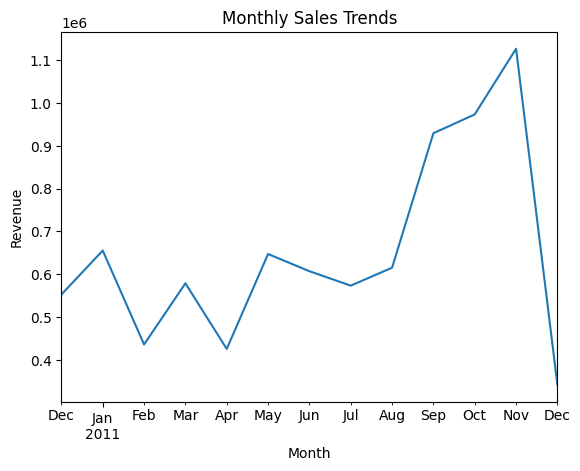

In [ ]:
# Identify seasonal trends in sales
monthly_sales = df.groupby('InvoiceMonth')['TotalRevenue'].sum()
monthly_sales.plot(kind='line', xlabel='Month', ylabel='Revenue', title='Monthly Sales Trends')

The provided code calculates and shows the "Discount Effect on Sales" based on the applied discount. Here's a breakdown of what the code does:

* It applies a discount to the sales data based on the quantity by price ratio.
* The lambda function checks the value of the 'QuantityPriceRatio' for each row in the dataframe.
* If the 'QuantityPriceRatio' is greater than 0.60, it applies a 10% discount to the 'TotalRevenue' by multiplying it by 0.9.
* If the 'QuantityPriceRatio' is less than or equal to 0.60, no discount is applied, and the 'TotalRevenue' remains unchanged.
* The discounted sales are calculated by summing the 'DiscountedTotalRevenue' column.
* The total sales are calculated by summing the 'TotalRevenue' column.
* The discount effect on sales is determined by dividing the discounted sales by the total sales.
* The result, the "Discount Effect on Sales," is printed.

This allows you to analyze the impact of the applied discount on the overall sales, specifically when the quantity by price ratio is greater than 0.60.

In [ ]:
# Calculate the quantity by price ratio
df['QuantityPriceRatio'] = df['Quantity'] / df['UnitPrice']
# Apply discount based on the quantity by price ratio
df['DiscountedTotalRevenue'] = df.apply(lambda row: row['TotalRevenue'] * 0.9 if row['QuantityPriceRatio'] > 0.60 else row['TotalRevenue'], axis=1)

# Calculate the total discounted sales
discounted_sales = df['DiscountedTotalRevenue'].sum()

# Calculate the total sales
total_sales = df['TotalRevenue'].sum()

# Calculate the discount effect on sales
discount_effect = discounted_sales / total_sales

print('Discount Effect on Sales:', discount_effect)


Discount Effect on Sales: 0.905279079116328


**Market basket analysis**

In [ ]:
from mlxtend.frequent_patterns import apriori

# Perform market basket analysis
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

# Filter and print frequent itemsets with minimum support
min_support = 0.06
frequent_itemsets = frequent_itemsets[frequent_itemsets['support'] >= min_support]
print('Frequent Itemsets:')
print(frequent_itemsets)


Frequent Itemsets:
    support                              itemsets
0  0.061965       (ASSORTED COLOUR BIRD ORNAMENT)
1  0.072105             (JUMBO BAG RED RETROSPOT)
3  0.062190                       (PARTY BUNTING)
4  0.076791            (REGENCY CAKESTAND 3 TIER)
6  0.088824  (WHITE HANGING HEART T-LIGHT HOLDER)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Prepare data for time series forecasting
sales_data = df.groupby('InvoiceDate')['TotalRevenue'].sum()

# Split data into training and testing sets
train_size = int(len(sales_data) * 0.8)
train_data, test_data = sales_data[:train_size], sales_data[train_size:]

# Fit SARIMA model
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Forecast future sales
forecast = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Calculate mean squared error
mse = mean_squared_error(test_data, forecast)

print('Time Series Forecasting (SARIMA) Results:')
print('Mean Squared Error:', mse)

# Print forecasted sales
print('Forecasted Sales:')
print(forecast)

# Print actual sales
print('Actual Sales:')
print(test_data)


Time Series Forecasting (SARIMA) Results:
Mean Squared Error: 14471216.18451712
Forecasted Sales:
16368    499.809617
16369    507.184097
16370    471.144693
16371    520.986486
16372    463.574228
            ...    
20455    526.573620
20456    546.691767
20457    530.393328
20458    546.662506
20459    567.725348
Name: predicted_mean, Length: 4092, dtype: float64
Actual Sales:
InvoiceDate
2011-10-24 14:29:00    454.20
2011-10-24 14:35:00    262.70
2011-10-24 14:36:00    499.97
2011-10-24 14:47:00    313.40
2011-10-24 14:49:00    237.60
                        ...  
2011-12-09 12:23:00    124.60
2011-12-09 12:25:00    140.64
2011-12-09 12:31:00    329.05
2011-12-09 12:49:00    339.20
2011-12-09 12:50:00    249.45
Name: TotalRevenue, Length: 4092, dtype: float64


**Customer segmentation**

In [ ]:
from sklearn.cluster import KMeans

# Perform customer segmentation using K-means clustering
customer_data = df.groupby('CustomerID').agg({'TotalRevenue': 'sum', 'InvoiceNo': 'nunique', 'Quantity': 'sum'})

kmeans = KMeans(n_clusters=4, random_state=0).fit(customer_data)

customer_data['Segment'] = kmeans.labels_
segment_counts = customer_data['Segment'].value_counts()
print('Customer Segmentation:')
print(segment_counts)

Customer Segmentation:
0    5342
3     189
2      22
1       4
Name: Segment, dtype: int64


RFM Analysis: RFM (Recency, Frequency, Monetary) analysis is a technique used for customer segmentation based on their purchasing behavior. It assigns a score to each customer based on the recency of their last purchase, the frequency of purchases, and the monetary value of purchases. You can use RFM analysis to segment customers into different groups and analyze their characteristics and preferences.

**RMF**

In [ ]:
import pandas as pd

# Perform RFM Analysis
recency = df.groupby('CustomerID')['InvoiceDate'].max()
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()
monetary = df.groupby('CustomerID')['TotalRevenue'].sum()

rfm_data = pd.concat([recency, frequency, monetary], axis=1)
rfm_data.columns = ['Recency', 'Frequency', 'Monetary']

# Perform RFM segmentation
# Customize the thresholds and labels based on your specific dataset
rfm_data['RecencyScore'] = pd.qcut(rfm_data['Recency'], q=4, labels=[4, 3, 2, 1])
rfm_data['FrequencyScore'] = pd.qcut(rfm_data['Frequency'], q=4, labels=False, duplicates='drop')
rfm_data['MonetaryScore'] = pd.qcut(rfm_data['Monetary'], q=4, labels=[1, 2, 3, 4])

# Calculate RFM score
rfm_data['RFM_Score'] = rfm_data['RecencyScore'].astype(str) + rfm_data['FrequencyScore'].astype(str) + rfm_data['MonetaryScore'].astype(str)

# Print RFM segments
print('RFM Segments:')
print(rfm_data['RFM_Score'].value_counts())


RFM Segments:
124    646
401    549
402    415
301    399
302    347
224    267
202    259
201    233
303    190
213    186
403    185
203    160
113    153
313    127
101    126
102    120
123    110
223     90
324     80
114     74
214     73
103     71
312     68
212     61
413     52
304     51
112     47
404     47
323     45
314     40
424     37
204     31
412     31
414     28
311     26
423     20
211     17
104     15
111     13
322     12
411     11
222     10
122     10
422      9
421      6
121      4
321      4
221      2
Name: RFM_Score, dtype: int64


*churn prediction*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Prepare data for churn prediction
churn_data = df.groupby('CustomerID').agg({
    'TotalRevenue': 'sum',
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
    'InvoiceDate': 'max'
})

churn_data['Churn'] = (df['InvoiceDate'].max() - churn_data['InvoiceDate']) > pd.Timedelta(days=365)
churn_data = churn_data.drop('InvoiceDate', axis=1)

# Split data into training and testing sets
X = churn_data.drop('Churn', axis=1)
y = churn_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model for churn prediction
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict churn on the test set
y_pred = logreg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('Churn Prediction Results:')
print('Accuracy:', accuracy)
print('Confusion Matrix:')
print(confusion_mat)

Churn Prediction Results:
Accuracy: 0.9784172661870504
Confusion Matrix:
[[1088    0]
 [  24    0]]


**Visualization**

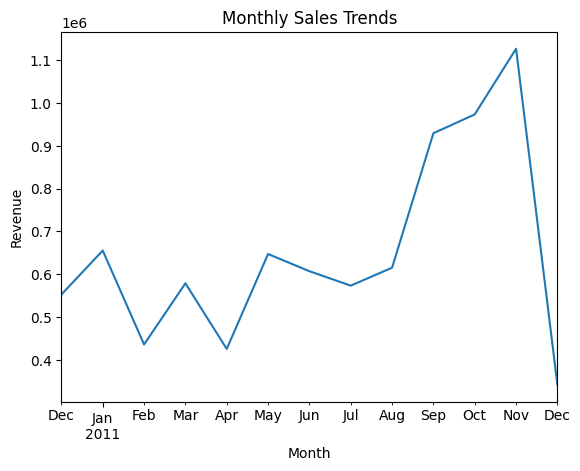

In [ ]:
import matplotlib.pyplot as plt

# Visualize sales trends over time
sales_trends.plot(kind='line', xlabel='Month', ylabel='Revenue', title='Monthly Sales Trends')
plt.show()

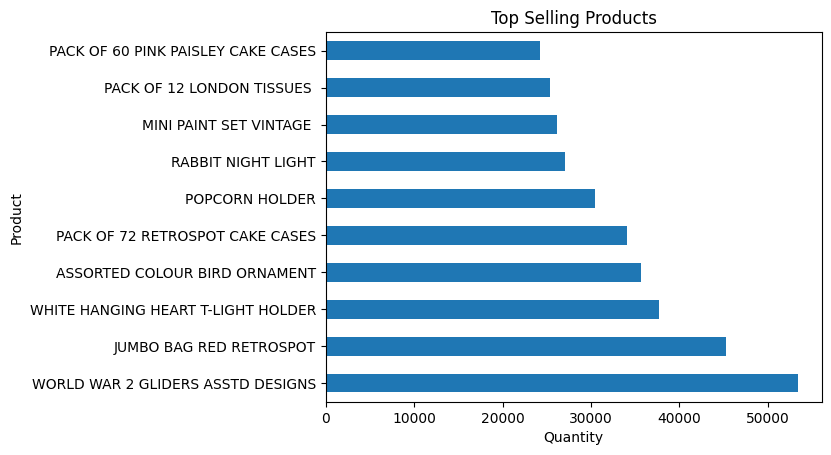

In [ ]:
# Visualize top-selling products
top_products.plot(kind='barh', xlabel='Quantity', ylabel='Product', title='Top Selling Products')
plt.show()

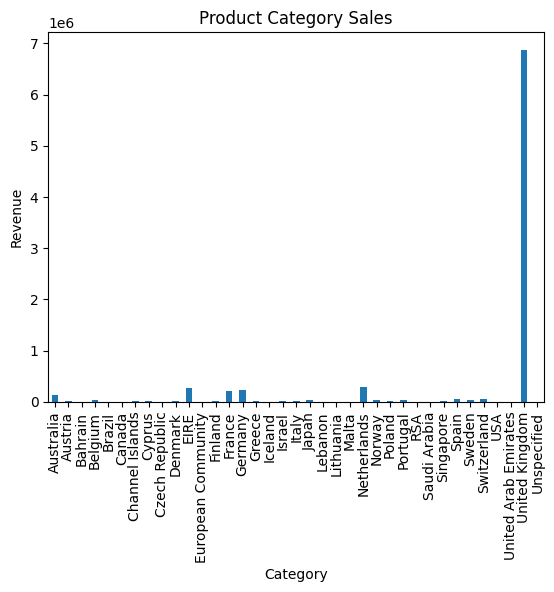

In [ ]:
# Visualize product category sales
product_category_sales.plot(kind='bar', xlabel='Category', ylabel='Revenue', title='Product Category Sales')
plt.show()





**Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression

# Linear Regression for Revenue Prediction
X_revenue = df[['TotalRevenue']]
y_revenue = df['Quantity']

linear_regression = LinearRegression()
linear_regression.fit(X_revenue, y_revenue)

# Predict revenue using Linear Regression
predicted_revenue = linear_regression.predict(X_revenue)

# Add predicted revenue to the DataFrame
df['PredictedRevenue'] = predicted_revenue

# Display the updated DataFrame
print(df.head())
#predicting the predicted revenue

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  TotalRevenue  \
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom         15.30   
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom         20.34   
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom         22.00   
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom         20.34   
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom         20.34   

  InvoiceMonth  QuantityPriceRatio  DiscountedTotalRevenue  PredictedRevenue  
0      2010-12           

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,InvoiceMonth,QuantityPriceRatio,DiscountedTotalRevenue,PredictedRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2.352941,13.770,9.004583
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,1.769912,18.306,11.985921
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2.909091,19.800,12.967870
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,1.769912,18.306,11.985921
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,1.769912,18.306,11.985921
